# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output Files (CSV)
output_data_file = "output_data/cities.csv"
clean_city_data_file = "output_data/cleancitydata.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# this is for practice ONLY api call using just 1 city
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
query_url = url + "&q=" + cities[0]
print(f"City = {cities[0]}")

# Get weather data
weather_response_json = requests.get(query_url).json()
weather_response_json

City = bambous virieux


{'coord': {'lon': 57.76, 'lat': -20.34},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 76.53,
  'feels_like': 74.16,
  'temp_min': 75.99,
  'temp_max': 77,
  'pressure': 1021,
  'humidity': 65},
 'visibility': 10000,
 'wind': {'speed': 12.75, 'deg': 110},
 'clouds': {'all': 75},
 'dt': 1596098601,
 'sys': {'type': 1,
  'id': 2061,
  'country': 'MU',
  'sunrise': 1596076796,
  'sunset': 1596117039},
 'timezone': 14400,
 'id': 1106677,
 'name': 'Bambous Virieux',
 'cod': 200}

In [4]:
# List for holding latitudes, temperature, humidity, cloudiness, wind speed
# List for countries also included for VacationPy processing
citys = []
countries = []
latitudes = []
longitudes = []
temps = []
humids = []
clouds = []
winds = []

#this counter is used index the city data based on successful calls
city_ctr = 0

# base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# loop through the cities list
for city in cities:
    city_ctr = city_ctr + 1
    query_url = url + "&q=" + city
    print(f"{city_ctr} {city}")
    # Get weather data
    weather_response_json = requests.get(query_url).json()
    try:
        # extract the data from the API response by appending to the corresponding list variable
        citys.append(weather_response_json['name'])
        countries.append(weather_response_json['sys']['country'])
        latitudes.append(weather_response_json['coord']['lat'])
        longitudes.append(weather_response_json['coord']['lon'])
        temps.append(weather_response_json['main']['temp_max'])
        humids.append(weather_response_json['main']['humidity'])
        clouds.append(weather_response_json['clouds']['all'])
        winds.append(weather_response_json['wind']['speed'])
    except:
        # skip the city if not found
        pass

1 bambous virieux
2 machilipatnam
3 rikitea
4 casper
5 ushuaia
6 hermanus
7 kualakapuas
8 kruisfontein
9 longyearbyen
10 vila franca do campo
11 bredasdorp
12 yellowknife
13 sorland
14 avera
15 taolanaro
16 punta arenas
17 provideniya
18 port alfred
19 nikolskoye
20 busselton
21 dikson
22 lagoa
23 northam
24 marawi
25 hobart
26 chupa
27 sisimiut
28 esperance
29 east london
30 lufilufi
31 rumphi
32 dingle
33 mataura
34 qaanaaq
35 atuona
36 husavik
37 swan hill
38 bonavista
39 port elizabeth
40 canutama
41 camacha
42 avarua
43 kapaa
44 kevsala
45 kavieng
46 manresa
47 samusu
48 nome
49 bethel
50 tuatapere
51 lat yao
52 brownsville
53 ewa beach
54 albany
55 cabo san lucas
56 barentsburg
57 tasiilaq
58 new norfolk
59 wulanhaote
60 mount hagen
61 lebu
62 maryville
63 severo-kurilsk
64 umm kaddadah
65 natal
66 sao joao da boa vista
67 katherine
68 jijiga
69 tsihombe
70 saint-philippe
71 guerrero negro
72 upernavik
73 cape town
74 rapar
75 grand gaube
76 ghamarwin
77 touros
78 hamilton
79 bel

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a dictionary to contain all the list variables
weather_dict = {
    "city": citys,
    "country": countries,    
    "latitude": latitudes,
    "longitude": longitudes,
    "temp": temps,
    "humid": humids,
    "cloud": clouds,
    "wind": winds
}

# convert the dictionary into a dataframe
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df

,city,country,latitude,longitude,temp,humid,cloud,wind
0,Bambous Virieux,MU,-20.34,57.76,77.00,65,75,12.75
1,Machilipatnam,IN,16.17,81.13,89.60,70,75,5.82
2,Rikitea,PF,-23.12,-134.97,72.73,87,100,15.70
3,Casper,US,42.87,-106.31,62.01,82,20,5.82
4,Ushuaia,AR,-54.80,-68.30,33.80,69,40,8.05
...,...,...,...,...,...,...,...,...
558,Ambovombe,MG,-25.17,46.08,77.09,46,0,9.78
559,Alihe,CN,50.57,123.72,78.08,65,70,4.12
560,Quthing,LS,-30.40,27.70,56.01,35,0,3.51
561,San José Poaquil,GT,14.82,-90.91,64.40,93,40,9.17


In [6]:
# write dataframe into a CSV file
weather_data_df.to_csv(output_data_file, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity_lessthan_100_df = weather_data_df[weather_data_df["humid"].astype(float) <= 100]
humidity_lessthan_100_df

,city,country,latitude,longitude,temp,humid,cloud,wind
0,Bambous Virieux,MU,-20.34,57.76,77.00,65,75,12.75
1,Machilipatnam,IN,16.17,81.13,89.60,70,75,5.82
2,Rikitea,PF,-23.12,-134.97,72.73,87,100,15.70
3,Casper,US,42.87,-106.31,62.01,82,20,5.82
4,Ushuaia,AR,-54.80,-68.30,33.80,69,40,8.05
...,...,...,...,...,...,...,...,...
558,Ambovombe,MG,-25.17,46.08,77.09,46,0,9.78
559,Alihe,CN,50.57,123.72,78.08,65,70,4.12
560,Quthing,LS,-30.40,27.70,56.01,35,0,3.51
561,San José Poaquil,GT,14.82,-90.91,64.40,93,40,9.17


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100_df = weather_data_df[weather_data_df["humid"].astype(float) > 100]
humidity_over_100_df.index.values

array([], dtype=int64)

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = weather_data_df.drop(humidity_over_100_df.index.values, inplace=False)
clean_city_data_df

,city,country,latitude,longitude,temp,humid,cloud,wind
0,Bambous Virieux,MU,-20.34,57.76,77.00,65,75,12.75
1,Machilipatnam,IN,16.17,81.13,89.60,70,75,5.82
2,Rikitea,PF,-23.12,-134.97,72.73,87,100,15.70
3,Casper,US,42.87,-106.31,62.01,82,20,5.82
4,Ushuaia,AR,-54.80,-68.30,33.80,69,40,8.05
...,...,...,...,...,...,...,...,...
558,Ambovombe,MG,-25.17,46.08,77.09,46,0,9.78
559,Alihe,CN,50.57,123.72,78.08,65,70,4.12
560,Quthing,LS,-30.40,27.70,56.01,35,0,3.51
561,San José Poaquil,GT,14.82,-90.91,64.40,93,40,9.17


In [11]:
# Extract relevant fields from the data frame
clean_city_data = clean_city_data_df[["city","country","latitude","longitude","temp","humid","cloud","wind"]]

# Export the City_Data into a CSV
clean_city_data.to_csv(clean_city_data_file, index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
# compute for the current date and convert into mm/dd/yy format
from datetime import date

today = date.today()

currentdate_mmddyy_format = today.strftime("%m/%d/%y")
print("currentdate_mmddyy_format =", currentdate_mmddyy_format)

currentdate_mmddyy_format = 07/30/20


In [13]:
# store dataframe columns into lists for plotting
clean_latitudes = clean_city_data_df["latitude"]
clean_temps = clean_city_data_df["temp"]
clean_humids = clean_city_data_df["humid"]
clean_clouds = clean_city_data_df["cloud"]
clean_winds = clean_city_data_df["wind"]

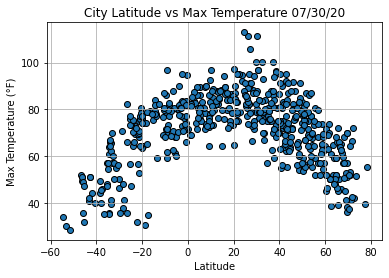

In [14]:
# scatter plot graph of City Latitude vs Max Temperature
plt.scatter(clean_latitudes, clean_temps, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Max Temperature {currentdate_mmddyy_format}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

plt.savefig("Images/City Latitude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

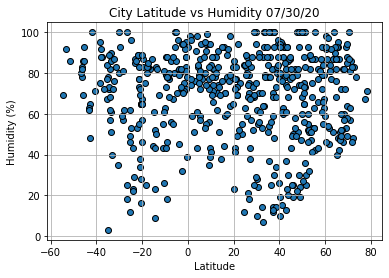

In [18]:
# scatter plot graph of City Latitude vs Humidity 
plt.scatter(clean_latitudes, clean_humids, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Humidity {currentdate_mmddyy_format}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Images/City Latitude vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

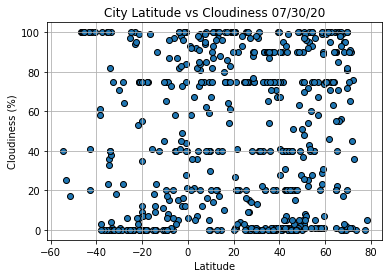

In [19]:
# scatter plot graph of City Latitude vs Cloudiness 
plt.scatter(clean_latitudes, clean_clouds, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Cloudiness {currentdate_mmddyy_format}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/City Latitude vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

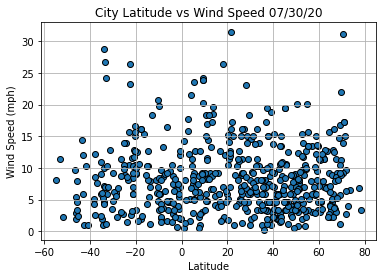

In [20]:
# scatter plot graph of City Latitude vs Wind Speed 
plt.scatter(clean_latitudes, clean_winds, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Wind Speed {currentdate_mmddyy_format}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/City Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots

In [22]:
# create Northern and Southern Hemisphere dataFrames
north_hem_weather_data_df = clean_city_data_df[clean_city_data_df["latitude"].astype(float) >= 0]
south_hem_weather_data_df = clean_city_data_df[clean_city_data_df["latitude"].astype(float) < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

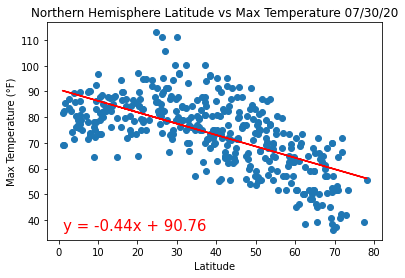

In [23]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Max Temperature {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')

plt.show()

This figure shows that the higher the latitude, the lower the temperature.
Lower latitudes in the Northern Hemisphere are closer to the equator, therefore the temperature is hotter.



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

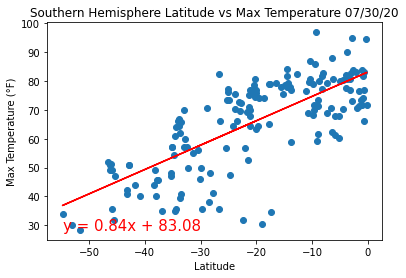

In [24]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Max Temperature {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')

plt.show()

This figure shows that the higher the latitude, the higher the temperature.
Lower latitudes in the Southern Hemisphere are closer to the South Pole, therefore the temperature is colder.



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

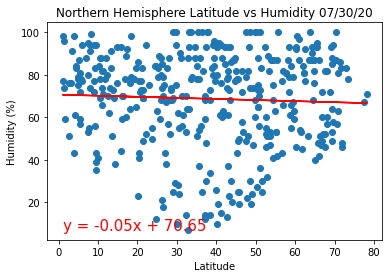

In [25]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["humid"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Humidity {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

In the Northern Hemisphere, it is observed that there is a wide range of humidity in lower and higher latitudes.
Middle latitudes (30 to 50), however, have wider range, which are more on the lower humidity level.
 


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

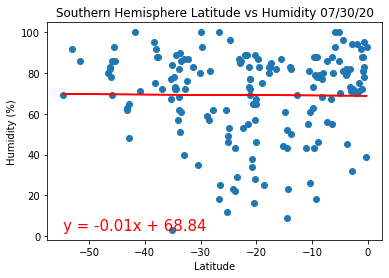

In [26]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["humid"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Humidity {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

In the Southern Hemisphere, it is observed that there is a wide range of humidity in higher latitudes; wider range in middle latitudes (-35 to 20) which are more on the lower humidity level. Lowest latitudes (-45 and lower) have high humidity level.



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

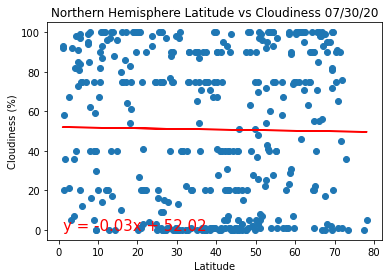

In [27]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["cloud"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Cloudiness {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

Cloudiness in the Northern Hemisphere is noticeably at a wide range at this time of the year based on this graph. 
The graph also shows a lot of cities with 100% cloudiness in lower and higher latitudes, while 0% cloudiness from middle to higher latitudes.



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

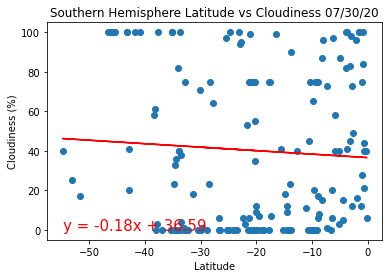

In [28]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["cloud"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Cloudiness {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

Cloudiness in the Southern Hemisphere is also at a wide range at this time of the year. 
The graph shows cities with 100% cloudiness in different latitudes, while 0% cloudiness from middle to higher latitudes.



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

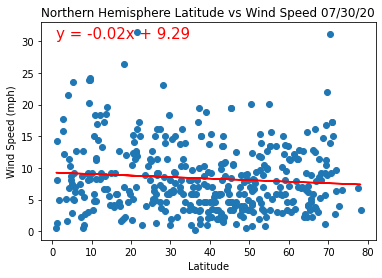

In [29]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),max(y_values)-1),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Wind Speed {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()

Northern Hemisphere has noticeably a lot larger data with lower wind speed across all latitudes.



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

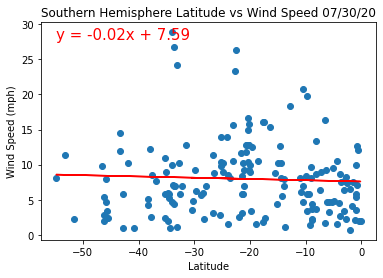

In [30]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),max(y_values)-1),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Wind Speed {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()

Southern Hemisphere also has larger data with lower wind speed across all latitudes.



# Observations

1. City Latitude vs Max Temperature scatter plot shows that the cities with the hottest temperatures are those located between latitude 20 and 40.  This opposes common thinking it is always hotter in the cities at the equator.  It is hotter in than in Iran and Iraq (which are between 25 and 35 latitude) than in Maldives (which is close to the equator).

2. Wind speed are mostly below 15mph across all latitudes at this time of the year.

3. Humidity level are mostly high (60% to 100%) across all latitudes at this time of the year. 